In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
len(merge_data["Mouse ID"].unique())

249

In [7]:
merge_data['Mouse ID'].value_counts()

g989    13
h246    10
v991    10
s337    10
z578    10
        ..
v199     1
o848     1
h428     1
t573     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
duplicate_mouse_id = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_id = duplicate_mouse_id["Mouse ID"]
print(duplicate_mouse_id)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [9]:
duplicate_mouse = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse_id) == False]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
drug_group = duplicate_mouse.groupby('Drug Regimen')
tumor_drug_group = drug_group["Tumor Volume (mm3)"].count()
tumor_drug_list = tumor_drug_group.values.tolist()

In [11]:
means = drug_group.mean()['Tumor Volume (mm3)']
medians = drug_group.median()["Tumor Volume (mm3)"]
variance = drug_group.var()["Tumor Volume (mm3)"]
stddev = drug_group.std()["Tumor Volume (mm3)"]
sems = drug_group.sem()["Tumor Volume (mm3)"]

summary_table = {"Tumor Volume Mean": means,
                    "Tumor Volume Median": medians,
                    "Tumor Volume Variance": variance,
                    "Tumor Volume Standard Deviation": stddev,
                    "Tumor Volume Standard Error": sems}
summary_df = pd.DataFrame(summary_table)
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
drug_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


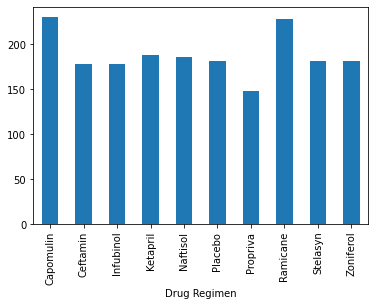

In [13]:
tumor_drug_group.plot.bar()
plt.show()

([<matplotlib.axis.XTick at 0x15a9c75cfd0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

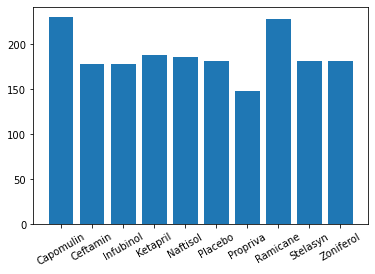

In [14]:
x_axis = np.arange(len(tumor_drug_list))
plt.bar(x_axis,tumor_drug_list,)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation=30)

In [15]:
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])

In [16]:
gender_mouse = duplicate_mouse.groupby("Sex")
gender_group = gender_mouse.count()
gender_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


<AxesSubplot:ylabel='Mouse ID'>

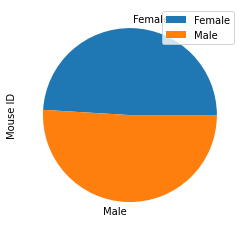

In [17]:
gender_group.plot.pie(y="Mouse ID")

In [18]:
gender_count = gender_group["Mouse ID"].tolist()
gender_count

[922, 958]

([<matplotlib.patches.Wedge at 0x15a9c858400>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

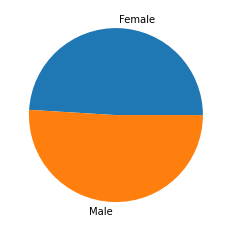

In [19]:
gender = ["Female","Male"]
plt.pie(gender_count,labels=gender)

In [20]:
# Go through duplicate_mouse for greatest timepoint of each mouse
#Group by Drug Regimen
#Pull out Capomulin, Ramicane, Infubinol, and Ceftamin
duplicate_mouse_max = duplicate_mouse.groupby("Mouse ID")
duplicate_mouse_max_x = duplicate_mouse_max.max()["Timepoint"]
duplicate_mouse_max_x

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [21]:
duplicate_mouse_max_df = duplicate_mouse_max_x.to_frame()
duplicate_mouse_max_df


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [22]:
duplicate_mouse_merge = pd.merge(duplicate_mouse,duplicate_mouse_max_df, on = ["Mouse ID","Timepoint"])
duplicate_mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

In [24]:
for treatment in treatments:
    #.loc for going through drug treatments to get tumor volume
    grouped_drug_df = duplicate_mouse_merge.loc[duplicate_mouse_merge["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    tumor_vol.append(grouped_drug_df)

In [25]:
print(tumor_vol)

[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64, 49     67.973419
50     65.525743
57     57.031862
58     66.083066
70     72.226731
74   

In [26]:
tumor_df = tumor_vol.to_frame()
tumor_df

AttributeError: 'list' object has no attribute 'to_frame'